# CIFAR-10 with Keras


## Keras 
keras 是一種高階的深度學習工具，由python撰寫，可以使用少量的程式碼來建立深度學習的模型。  
keras 在使用上必須配合後端引擎，目前支援如Theano、CNTK和Tensorflow等，目前大多數keras應用都是Tensorflow backend的。  

## CIFAR-10

CIFAR的全名為Canadian Institute for Advanced Research，是由加拿大政府出資並由多位科學家、工程師收集而成的圖片資料庫。  
CIFAR-10由 60000張 32X32 的RGB彩色圖片構成，共10種分類，目前此數據用於競賽上，50000張為訓練資料，10000張為測試資料。  
![10種類別](https://img-blog.csdn.net/20170322103646555?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvZGlhbW9uam95X3pvbmU=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center)

keras提供整理好的CIFAR-10資料，只要透過import就可以拿到切好的training、testing資料。

Category: [6]


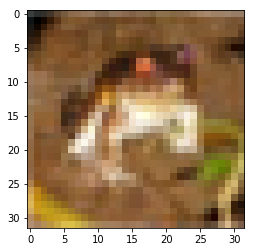

In [17]:
%matplotlib inline

import matplotlib
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

matplotlib.pyplot.imshow(x_train[0])
print('Category:', y_train[0])

## Keras Model 介紹

### Sequential Model
Sequential() 是keras中一種常用的model型態，宣告完Sequential()之後可以使用add()函數來將Layer按照順序加入model中，被加入的layer就會依照加入的順序被執行出來。

### Dense Layer 
Dense Layer 就是普通型態的一層神經網路，假設X是輸入資料，則Dense Layer會學習一組參數W和常數b，使得經過這層的輸出等於 W*X + b。  

### Convolution Layer 
Convolution Layer 是使用convolution來實作一層神經網路，有關於convolution的說明見以下網址。    
https://goo.gl/MDJbKt  
  
在影像、圖片應用上，Convolution的表現比普通Dense Layer更為優異。  

### MaxPooling
Pooling的機制是對眾多圖片的Pixel做篩選，篩選出分類器認為有用的局部特徵(feature)，篩選的機制有很多種，例如該Pixel在該範圍內的平均值、最大、最小值等等，在MaxPooling我們使用的是取局部最大值。

## 訓練神經網路

In [18]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

x_train = x_train[:10000].astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = to_categorical(y_train[:10000], num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#---------------------參數-----------------------------#

epochs = 20
batch_size = 128 
learning_rate = 0.001

#------------------------------------------------------#


#宣告Sequential model
model = Sequential()

# 一層一層加入Layer

# Conv2D的宣告方式為 Conv2D(神經元數量, (Filter size))
# keras規定第一層需要宣告input data的size，而CIFAR-10的size為(32, 32, 3)
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))

#MaxPooling2D((n, m))，(n, m)代表要每n*m的範圍做一次pooling
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))
#------------------------------------------------------#

#--------------請多加幾層 Conv2D or Pooling-------------#

#------------------------------------------------------#

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 4s 437us/step - loss: 1.9706 - acc: 0.2915 - val_loss: 1.7682 - val_acc: 0.3792
Epoch 2/20
10000/10000 [==============================] - 4s 414us/step - loss: 1.6685 - acc: 0.4257 - val_loss: 1.6503 - val_acc: 0.4251
Epoch 3/20
10000/10000 [==============================] - 4s 415us/step - loss: 1.5150 - acc: 0.4795 - val_loss: 1.5114 - val_acc: 0.4748
Epoch 4/20
10000/10000 [==============================] - 4s 415us/step - loss: 1.3967 - acc: 0.5216 - val_loss: 1.4852 - val_acc: 0.4714
Epoch 5/20
10000/10000 [==============================] - 4s 417us/step - loss: 1.3160 - acc: 0.5464 - val_loss: 1.4163 - val_acc: 0.4975
Epoch 6/20
10000/10000 [==============================] - 4s 417us/step - loss: 1.2470 - acc: 0.5736 - val_loss: 1.3596 - val_acc: 0.5185
Epoch 7/20
10000/10000 [==============================] - 4s 417us/step - loss: 1.2035 - acc: 0.5818 - val_loss: 1.3629 - 